# Student Admission Dataset

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')
data.rename(columns={'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating', 'Chance of Admit':'Chance_of_Admit'}, inplace=True)
data

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
data.columns = [feature.strip() for feature in data.columns] 

In [4]:
#to see the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# observation 

All the features are numerical features(discrete featurues and continuous features).

In [5]:
#checking the null values 
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# observation

there are no null values present in the dataset.

In [6]:
#seperating out the discrete and continuous features
discrete_features = [feature for feature in data.columns if data[feature].nunique()<15]
discrete_features

['University_Rating', 'SOP', 'LOR', 'Research']

In [7]:
#continuous features 
continuous_features = [feature for feature in data.columns if feature not in discrete_features+['Serial No.']]
continuous_features

['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance of Admit']

In [8]:
#descriptive analysis of features
data.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Univariate Analysis of data

In [9]:
#importing probplot for q-q plot
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


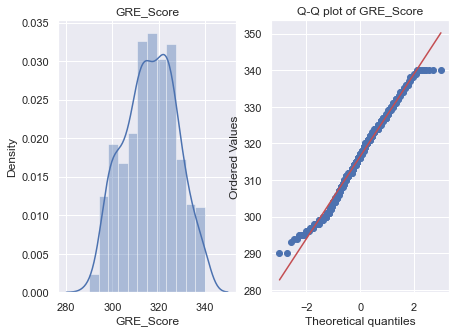

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


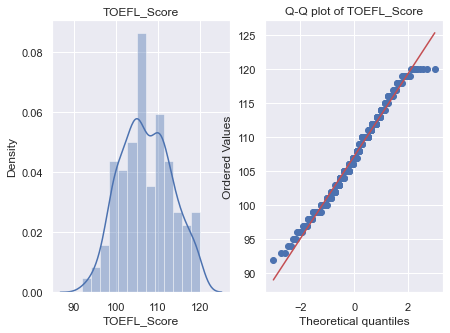

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


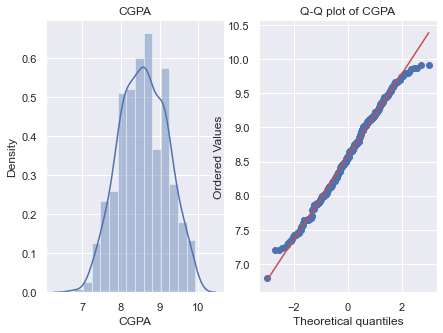

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


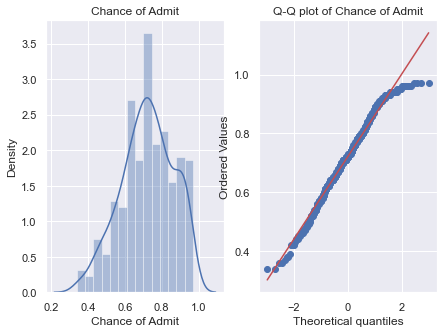

In [10]:
#distribution of continupous features 
for feature in continuous_features:
    plt.figure(figsize=(7,5))
    sns.set_theme()
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.title(feature)
    plt.subplot(1,2,2)
    probplot(data[feature], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q plot of {}'.format(feature))
    plt.show()

# observation

Almost all the continuous features are approximately normally distributed.

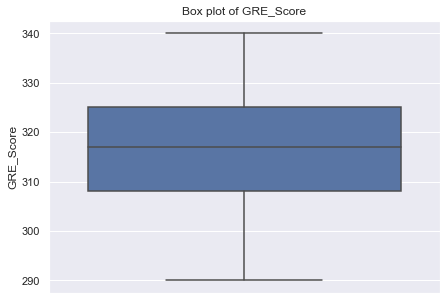

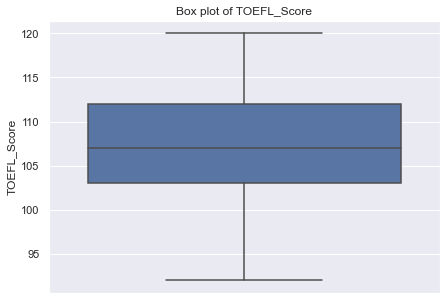

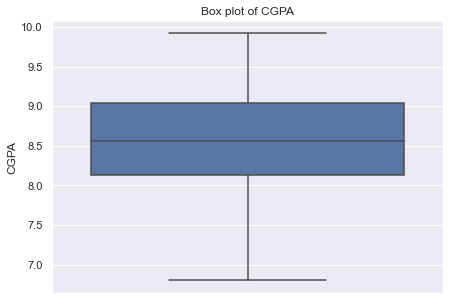

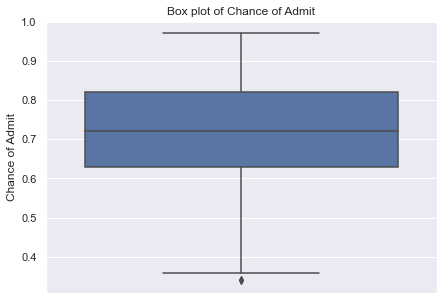

In [11]:
#checking the outliers by plotting box plot
for feature in continuous_features:
    sns.set_theme()
    plt.figure(figsize=(7,5))
    sns.boxplot(y=data[feature])
    plt.title('Box plot of {}'.format(feature))
    plt.show()

# observation

There are no outliers present in the continuous features.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


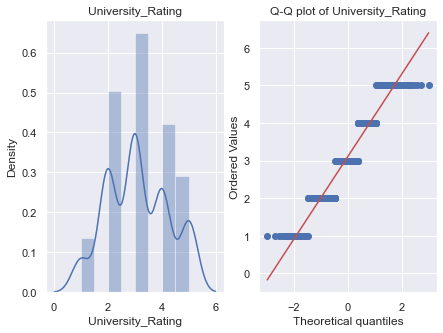

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


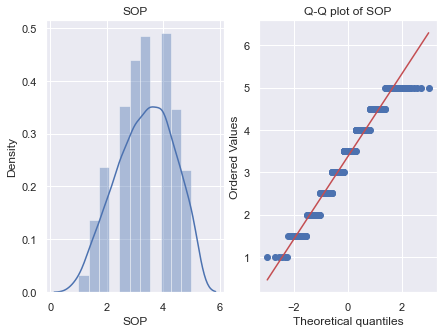

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


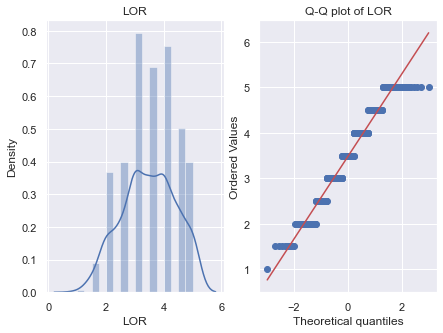

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


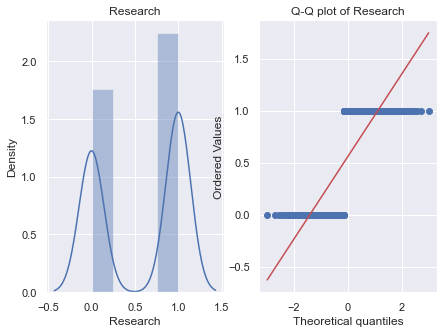

In [12]:
#to see the distribution of discrete variables
for feature in discrete_features:
    plt.figure(figsize=(7,5))
    sns.set_theme()
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.title(feature)
    plt.subplot(1,2,2)
    probplot(data[feature], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q plot of {}'.format(feature))
    plt.show()
    

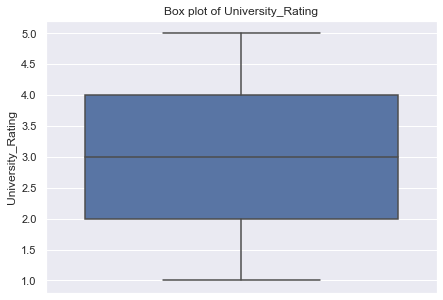

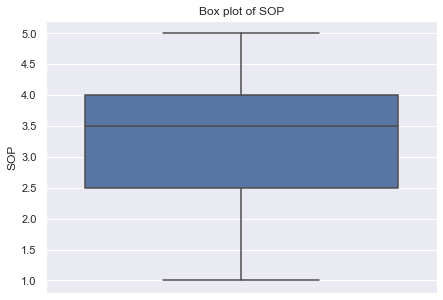

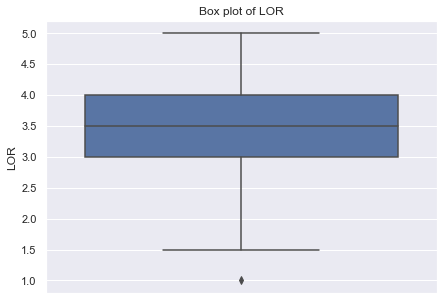

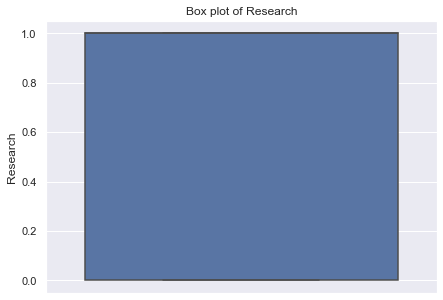

In [13]:
#boxplot of dsicrete features 
for feature in discrete_features:
    sns.set_theme()
    plt.figure(figsize=(7,5))
    sns.boxplot(y=data[feature])
    plt.title('Box plot of {}'.format(feature))
    plt.show()

# Multivariate Analysis

In [14]:
#dropping the Serial No.column
data.drop('Serial No.', axis=1, inplace=True)

In [15]:
#see the co relation between the variables
round(data.corr(), 2)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE_Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL_Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University_Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


<AxesSubplot:>

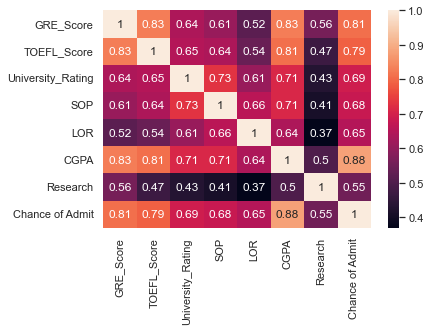

In [16]:
#visualizing the corelation of the variables by plotting heatmap
sns.heatmap(round(data.corr(), 2), annot=True)

# observation

1. GRE score and TOefl score having corelation of 0.83
2. GRE score and CGPA having high corelation of 0.83
3. Target variable (chance of admit) is almost having high corelation with all the independent features

There are high chances of multi colinearity between the variables

In [17]:
numerical_features = continuous_features+discrete_features
numerical_features

['GRE_Score',
 'TOEFL_Score',
 'CGPA',
 'Chance of Admit',
 'University_Rating',
 'SOP',
 'LOR',
 'Research']

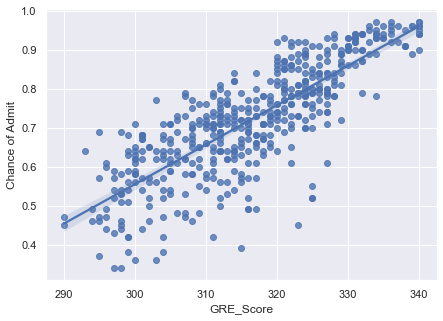

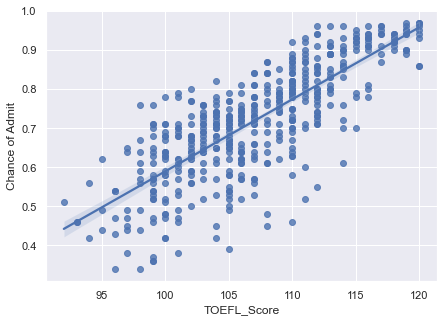

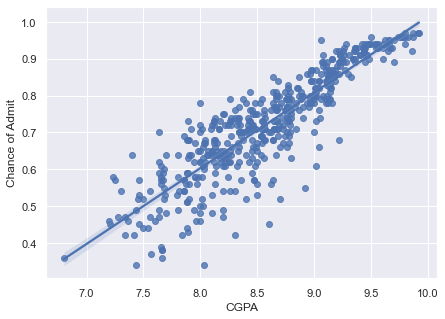

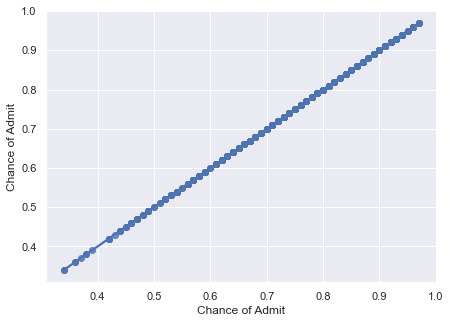

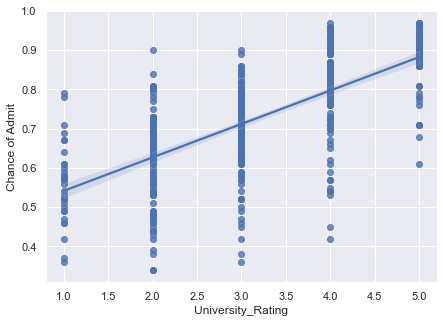

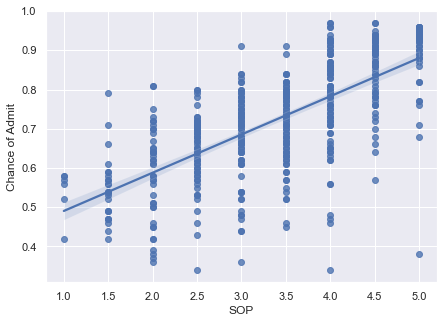

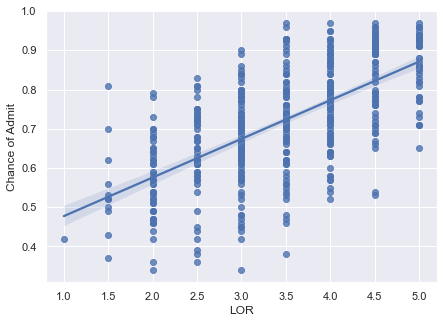

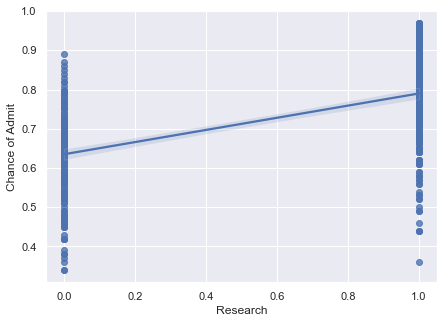

In [18]:
for feature in numerical_features:
    plt.figure(figsize=(7,5))
    sns.regplot(x=data[feature], y=data['Chance of Admit'])
    plt.show()

# observation

1. chance of admit increases with increase in GRE score
2. chance of admit increases with increase in TOEFL score
3. chance of admit increases with CGPA

chance of admit shows upward trend with all the independent variables.

In [19]:
#splitting independent and dependent features by creating x and y variables
#creating x variable
x = data.drop('Chance of Admit', axis=1)

In [20]:
#creating y variable
y = data['Chance of Admit']

In [21]:
#importing train and test split for model fixing purpose
from sklearn.model_selection import train_test_split

In [22]:
#splitting train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [23]:
#shape of train and test split
print ('shape of x_train:', x_train.shape, '\nshape of x_test:', x_test.shape, '\nshape of y_train:', y_train.shape, '\nshape of y_test:', y_test.shape)

shape of x_train: (400, 7) 
shape of x_test: (100, 7) 
shape of y_train: (400,) 
shape of y_test: (100,)


In [24]:
#importing standard scalar to scale the dataset
from sklearn.preprocessing import StandardScaler

In [25]:
#creating object for Standard scalar
std = StandardScaler()

In [26]:
#transforming the train and test datasets using standard scalar
x_train = std.fit_transform(x_train)
x_train

array([[-0.59264796, -0.68935678, -0.98133529, ..., -1.06743945,
        -0.57508173, -1.15723001],
       [-1.12456834, -0.68935678,  1.60680174, ..., -0.52764706,
        -1.10412055, -1.15723001],
       [ 0.73715299,  0.45480385, -0.98133529, ..., -1.06743945,
         0.28460635,  0.86413245],
       ...,
       [ 2.06695395,  1.27206145,  1.60680174, ...,  1.0917301 ,
         0.78058025,  0.86413245],
       [ 0.38253941,  0.78170689, -0.11862295, ...,  1.0917301 ,
         0.59872315,  0.86413245],
       [-0.41534116, -1.50661438, -1.84404764, ..., -0.52764706,
        -0.67427651,  0.86413245]])

In [27]:
#transforming test variable
x_test = std.fit_transform(x_test)
x_test

array([[ 0.83307673,  1.17065017,  0.91801516, -0.29326205, -1.59723432,
        -0.2182252 , -1.02020406],
       [-1.47609117, -1.20114467, -1.89223534, -1.86430878, -1.59723432,
        -1.06910329, -1.02020406],
       [ 0.12256353, -0.523489  , -0.95548517,  1.27778467,  0.58329035,
        -0.10143802, -1.02020406],
       [-0.32150722, -1.37055859, -1.89223534, -2.38799102, -2.14236549,
        -0.86889668,  0.98019606],
       [ 1.09951917,  1.509478  ,  1.85476533,  1.80146691,  1.67355268,
         1.61700204,  0.98019606],
       [ 1.01070502, -0.69290292, -0.018735  ,  0.75410243,  0.58329035,
        -0.38506404,  0.98019606],
       [-0.41032137, -0.69290292, -0.018735  , -1.34062654,  0.58329035,
        -0.73542561, -1.02020406],
       [-1.03202042, -0.86231684, -0.95548517, -0.29326205,  0.58329035,
         0.33234297, -1.02020406],
       [ 0.12256353,  0.4929945 , -0.018735  ,  0.75410243,  1.12842152,
         0.96633056,  0.98019606],
       [ 0.56663428, -0.0152

In [28]:
#importing SVR model
from sklearn.svm import SVR

In [29]:
#creating object for SVR
svr = SVR()

In [30]:
#fitting the model by passing traning dataset
svr.fit(x_train, y_train)

SVR()

In [31]:
#coefficient of the model
svr.intercept_

array([0.6563513])

In [32]:
#predicting the model
y_pred = svr.predict(x_test)

# Performance Metrics

In [33]:
#importing necessary libraries for performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

In [34]:
#r2 score
svr_r2_score = round(r2_score(y_test, y_pred), 2)
svr_r2_score

0.72

In [35]:
#adjusted r2 score 
adjusted_r2_score=1-((1-svr_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
round(adjusted_r2_score, 2)

0.7

In [36]:
#mean squared error
round(mean_squared_error(y_test, y_pred), 2)

0.01

In [37]:
#mean absolute error
round (mean_absolute_error(y_test, y_pred), 2)

0.06

In [38]:
#median absolute error
round(median_absolute_error(y_test, y_pred))

0